In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
import datetime

%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
color = sns.color_palette()
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
file = r'../data/OnlineRetail.csv'
online = pd.read_csv(file, encoding='Unicode_escape', parse_dates=['InvoiceDate'])
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [3]:
def get_month(x):
    return datetime.datetime(x.year, x.month, 1)

online['InvoiceMonth'] = online['InvoiceDate'].apply(get_month)

In [4]:
online

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01


In [4]:
grouping = online.groupby('CustomerID')['InvoiceMonth']
online['CohortMonth'] = grouping.transform('min')
online.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01,2011-08-01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,2011-08-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-01,2011-08-01


In [5]:
online.dtypes

InvoiceNo               object
StockCode               object
Description             object
Quantity                 int64
InvoiceDate     datetime64[ns]
UnitPrice              float64
CustomerID             float64
Country                 object
InvoiceMonth    datetime64[ns]
CohortMonth     datetime64[ns]
dtype: object

In [5]:
def get_date_int(df, columns):
    year = df[columns].dt.year
    month = df[columns].dt.month
    return year, month


cohort_year, cohort_month = get_date_int(online, 'CohortMonth')
invoice_year, invoice_month = get_date_int(online, 'InvoiceDate')

In [6]:
year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month
online['CohortPeriod'] = year_diff * 12 + month_diff + 1  # +1是1为初始值

In [11]:
online.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortPeriod
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01,2011-08-01,5.0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,2011-08-01,5.0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5.0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5.0
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-01,2011-08-01,5.0


In [7]:
online['Cohort'] = online['CohortMonth'].astype(str)
online['Cohort'] = online['Cohort'].map(lambda x: x[:-3])

In [8]:
cohort_data = online.groupby(by=['Cohort', 'CohortPeriod'])['CustomerID'].nunique()
cohort_data

Cohort   CohortPeriod
2010-12  1.0             948
         2.0             362
         3.0             317
         4.0             367
         5.0             341
                        ... 
2011-10  2.0              93
         3.0              46
2011-11  1.0             321
         2.0              43
2011-12  1.0              41
Name: CustomerID, Length: 91, dtype: int64

In [11]:
cohort_data = cohort_data.reset_index()

In [12]:
cohort_counts = cohort_data.pivot_table(index='Cohort', columns='CohortPeriod', values='CustomerID')
cohort_counts

CohortPeriod,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
Cohort,,,,,,,,,,,,,
2010-12,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
cohort_sizes = cohort_counts.iloc[:, 0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention

CohortPeriod,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
Cohort,,,,,,,,,,,,,
2010-12,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
2011-01,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
2011-02,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
2011-03,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
2011-04,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
2011-05,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
retention = retention.round(3)*100

Text(0.5, 0, '周期')

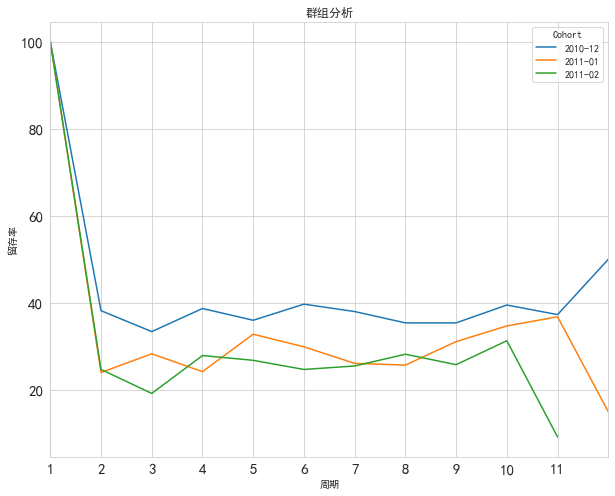

In [25]:
retention.iloc[[0, 1, 2], :].T.plot(figsize=(10, 8), fontsize=15)
plt.title('群组分析')
plt.xticks(np.arange(1, 12))
plt.xlim(1, 12)
plt.ylabel('留存率')
plt.xlabel('周期')

<AxesSubplot:title={'center':'留存率'}, xlabel='CohortPeriod', ylabel='Cohort'>

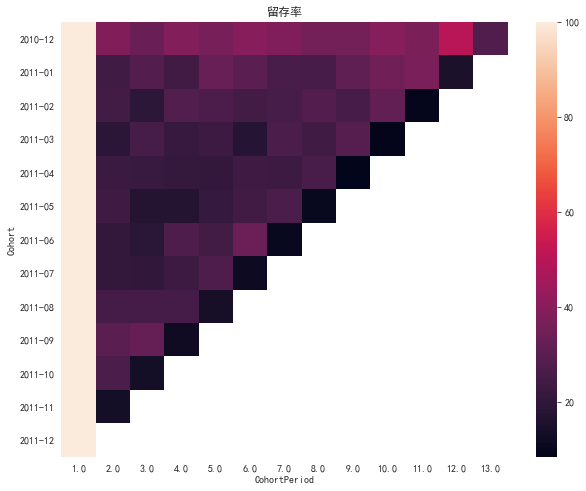

In [26]:
plt.figure(figsize=(10, 8))
plt.title('留存率')
sns.heatmap(data=retention)

<AxesSubplot:title={'center':'留存率'}, xlabel='CohortPeriod', ylabel='Cohort'>

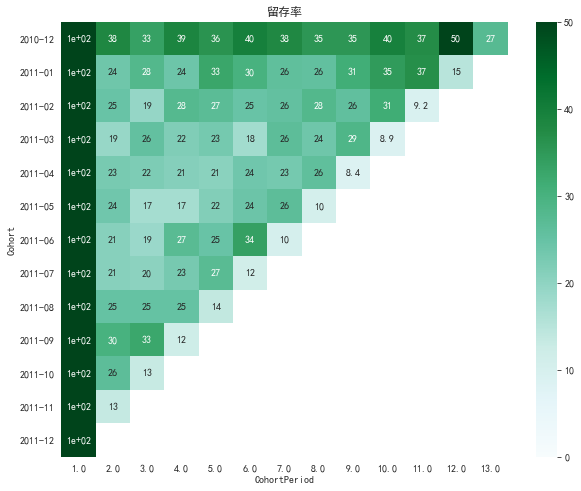

In [38]:
plt.figure(figsize=(10, 8))
plt.title('留存率')
sns.heatmap(data=retention, annot=True, vmin=0, vmax=50, cmap='BuGn')  # annot就是在网格上增加数字 ,v就是颜色深浅

In [40]:
grouping = online.groupby(['Cohort', 'CohortPeriod'])
cohort_data = grouping['Quantity'].sum()
cohort_data = cohort_data.reset_index()
cohort_data

,Cohort,CohortPeriod,Quantity
0,2010-12,1.0,296362
1,2010-12,2.0,158898
2,2010-12,3.0,137581
3,2010-12,4.0,179256
4,2010-12,5.0,130621
...,...,...,...
86,2011-10,2.0,25293
87,2011-10,3.0,7217
88,2011-11,1.0,97645
89,2011-11,2.0,10712


In [43]:
agveage_quantity = cohort_data.pivot_table(index='Cohort', columns='CohortPeriod', values='Quantity')
agveage_quantity

CohortPeriod,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
Cohort,,,,,,,,,,,,,
2010-12,296362.0,158898.0,137581.0,179256.0,130621.0,180723.0,179486.0,176790.0,199359.0,250098.0,247942.0,295012.0,109480.0
2011-01,110481.0,30076.0,37918.0,25940.0,46783.0,49259.0,40971.0,42740.0,45320.0,51135.0,59406.0,14446.0,NaN
2011-02,95176.0,17977.0,35957.0,29204.0,24658.0,23462.0,29430.0,33010.0,30498.0,35025.0,5501.0,NaN,NaN
2011-03,108861.0,14668.0,30494.0,22485.0,33079.0,26166.0,36815.0,43448.0,44489.0,8747.0,NaN,NaN,NaN
2011-04,71399.0,14501.0,12520.0,15067.0,16027.0,17165.0,18732.0,20576.0,3871.0,NaN,NaN,NaN,NaN
2011-05,66147.0,10141.0,12357.0,10861.0,16285.0,20327.0,19749.0,5912.0,NaN,NaN,NaN,NaN,NaN
2011-06,58373.0,12847.0,7670.0,20086.0,17631.0,24436.0,5757.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,48845.0,6668.0,9664.0,10880.0,11059.0,3710.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,47691.0,9582.0,15352.0,16614.0,6317.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
allsum = agveage_quantity.sum().sum()

In [48]:
agveage_quantity = agveage_quantity.apply(lambda x: x/allsum)
agveage_quantity

CohortPeriod,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
Cohort,,,,,,,,,,,,,
2010-12,0.060397,0.032383,0.028038,0.036532,0.026620,0.036830,0.036578,0.036029,0.040628,0.050969,0.050529,0.060122,0.022311
2011-01,0.022515,0.006129,0.007728,0.005286,0.009534,0.010039,0.008350,0.008710,0.009236,0.010421,0.012107,0.002944,NaN
2011-02,0.019396,0.003664,0.007328,0.005952,0.005025,0.004781,0.005998,0.006727,0.006215,0.007138,0.001121,NaN,NaN
2011-03,0.022185,0.002989,0.006215,0.004582,0.006741,0.005333,0.007503,0.008854,0.009067,0.001783,NaN,NaN,NaN
2011-04,0.014551,0.002955,0.002552,0.003071,0.003266,0.003498,0.003817,0.004193,0.000789,NaN,NaN,NaN,NaN
2011-05,0.013480,0.002067,0.002518,0.002213,0.003319,0.004143,0.004025,0.001205,NaN,NaN,NaN,NaN,NaN
2011-06,0.011896,0.002618,0.001563,0.004093,0.003593,0.004980,0.001173,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,0.009954,0.001359,0.001969,0.002217,0.002254,0.000756,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,0.009719,0.001953,0.003129,0.003386,0.001287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
agveage_quantity.sum()

CohortPeriod
1.0     0.247613
2.0     0.066226
3.0     0.066711
4.0     0.068907
5.0     0.061640
6.0     0.070360
7.0     0.067444
8.0     0.065719
9.0     0.065935
10.0    0.070310
11.0    0.063757
12.0    0.063066
13.0    0.022311
dtype: float64